In [1]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [2]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "eval_param"
tags = [x_metric]
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [3]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 40/40 [00:00<00:00, 25978.97it/s]


,_runtime,Self_Play/Entropies,Self_Play/Min_Reward,Self_Play/Mean_Entropy,Self_Play/Timesteps_STD,Self_Play/Cumulative_Reward,max_Self_Play/Mean_Reward_step,_timestamp,Self_Play/EMA_Reward,Self_Play/Max_Reward,...,expansion_policy,n_steps_learning,selection_policy,value_loss_weight,max_episode_length,policy_loss_weight,sample_batch_ratio,regularization_weight,tree_evaluation_policy,replay_buffer_multiplier
0,663.005755,"{'bins': [0.09179931420546313, 0.0926139476589...",-15,0.103366,0.925820,-922.875,8,1.707102e+09,-17.413211,-13,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
1,297.692401,"{'bins': [0.199351437886556, 0.201834391770155...",-23,0.254854,2.618615,-960.875,11,1.707102e+09,-21.180286,-15,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
2,1365.088321,"{'bins': [0.12991438462184027, 0.1300316780327...",-15,0.131287,0.744024,-1170.625,7,1.707101e+09,-20.161727,-13,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
3,759.642067,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-46,0.587311,10.099505,-1330.125,9,1.707100e+09,-36.205949,-20,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
4,1195.524682,"{'bins': [0.13361036076265223, 0.1340114579116...",-18,0.146740,1.195229,-2298.250,12,1.707099e+09,-61.547834,-15,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
5,759.228810,"{'bins': [0.3625505447387695, 0.36482136307224...",-31,0.417414,3.313932,-1840.375,14,1.707098e+09,-45.083985,-19,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
6,2333.196376,"{'bins': [0.3689301641363847, 0.37118923371773...",-33,0.442712,4.596194,-1803.750,9,1.707097e+09,-37.032396,-19,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
7,1378.342479,"{'bins': [0.4087485812959217, 0.41153290229184...",-145,0.485405,8.576338,-1729.125,10,1.707095e+09,-42.734114,-21,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
8,1369.889970,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-13,0.002832,0.000000,-1434.625,8,1.707093e+09,-24.301767,-13,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
9,309.862700,"{'bins': [0.1249704360961914, 0.12608725950121...",-19,0.137513,1.414214,-1391.375,10,1.707092e+09,-26.736618,-15,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10


In [4]:
df.columns

Index(['_runtime', 'Self_Play/Entropies', 'Self_Play/Min_Reward',
       'Self_Play/Mean_Entropy', 'Self_Play/Timesteps_STD',
       'Self_Play/Cumulative_Reward', 'max_Self_Play/Mean_Reward_step',
       '_timestamp', 'Self_Play/EMA_Reward', 'Self_Play/Max_Reward',
       'Training/Replay_Buffer_Size', 'Training/Policy_loss',
       'Training/Learning_Rate', 'Self_Play/Total_Runtime',
       'Training/Value_and_Policy_loss', 'Training/Regularization_loss',
       '_step', 'Self_Play/Rewards', 'Training/Value_loss',
       'Self_Play/Mean_Timesteps', 'max_Self_Play/Mean_Reward',
       'Self_Play/Reward_STD', 'Self_Play/Runtime_per_Timestep', '_wandb',
       'Self_Play/Timesteps', 'Self_Play/Mean_Reward',
       'Self_Play/Min_Timesteps', 'Self_Play/Total_Timesteps',
       'Training/Value_Simularities', 'Self_Play/Total_Average_Reward',
       'env_id', 'layers', 'puct_c', 'lr_gamma', 'eval_param', 'hidden_dim',
       'iterations', 'model_type', 'norm_layer', 'activation_fn',
      

In [12]:
save_folder = f'outfiles/{x_metric}'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

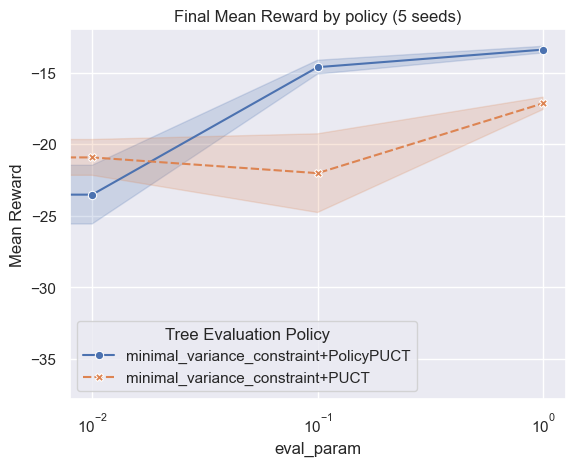

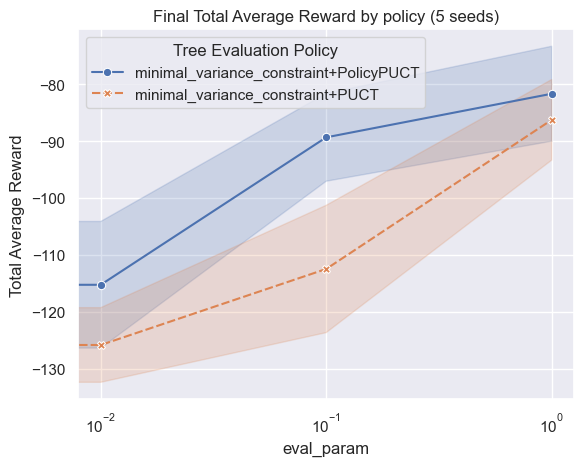

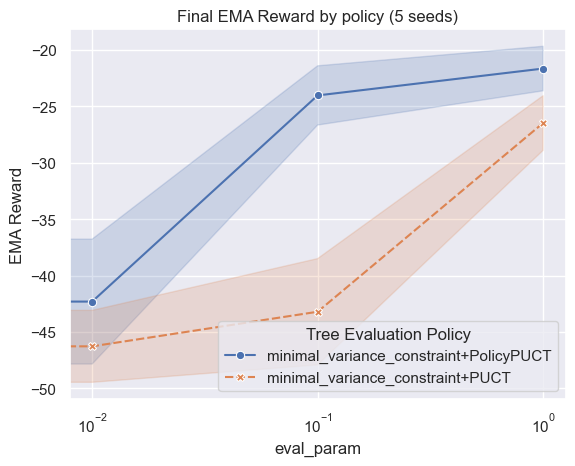

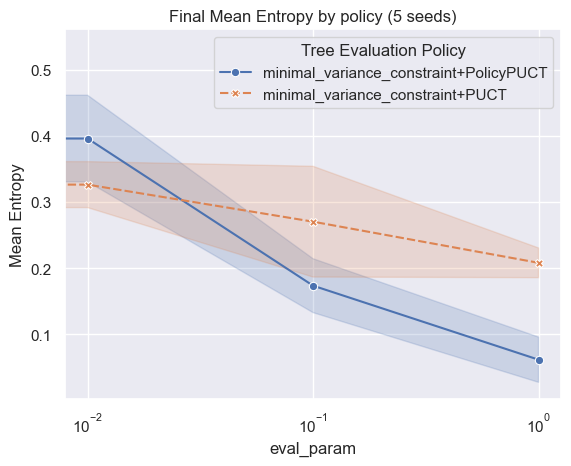

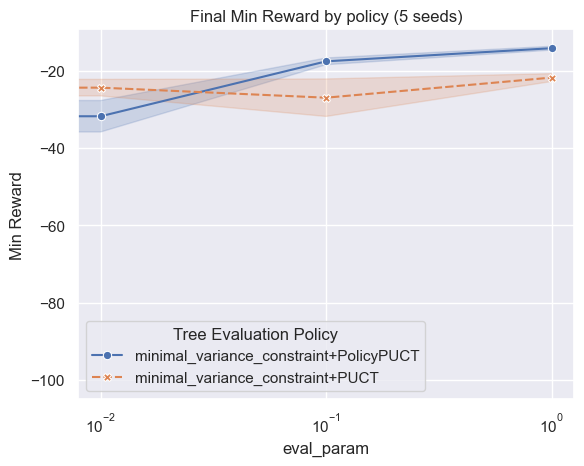

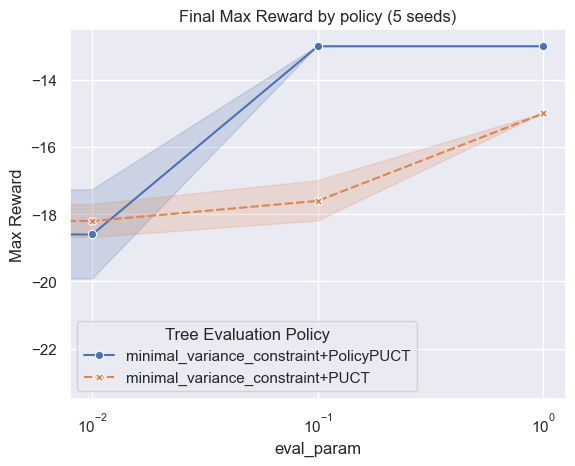

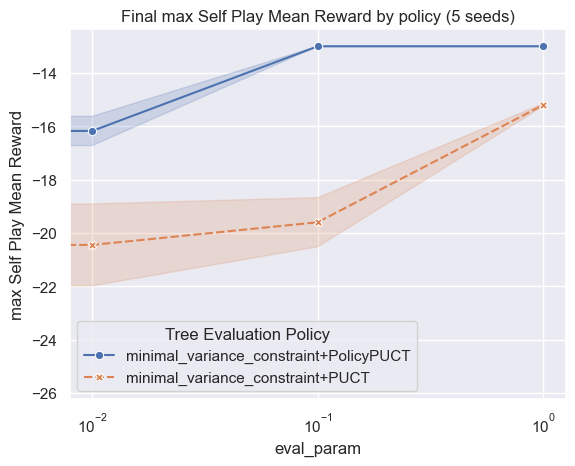

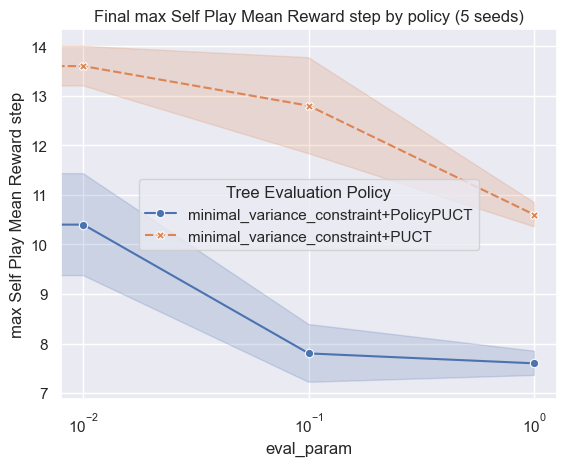

In [17]:


df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

metrics = ['Self_Play/Mean_Reward', "Self_Play/Total_Average_Reward", "Self_Play/EMA_Reward", 'Self_Play/Mean_Entropy', 'Self_Play/Min_Reward',
           'Self_Play/Max_Reward',
           'max_Self_Play/Mean_Reward', 'max_Self_Play/Mean_Reward_step'
           ]


estimator = "mean"
for metric in metrics:
    sns.set_theme(style="darkgrid")

    # Create a line plot with confidence intervals
    sns.lineplot(data=df[df['tree_evaluation_policy'] != 'mvto'],
                 x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator=estimator)

    # Customize the plot with titles and labels
    plt.title(f'Final {name_fn(metric)} by policy (5 seeds)')
    plt.xlabel(x_metric)  # Replace with actual x-axis label
    plt.ylabel(name_fn(metric))
    plt.legend(title='Tree Evaluation Policy')
    plt.gca().set_xscale('log', base=10)


    # save as pdf
    plt.savefig(f'{save_folder}/{name_fn(metric).replace(" ", "_")}_by_policy_{estimator}.pdf')

    # Show the plot
    plt.show()
